# **LetsGrowMore**
**Name :** Gannu Sravan Reddy

**Task-2 :** Stock Market Prediction And Forecasting Using Stacked LSTM

**Level :** BEGINNER LEVEL TASK


# **Importing Basic packages**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

# **Reading data set and displaying it**

In [95]:
df = pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [96]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
...,...,...,...,...,...,...,...,...
2095,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
2096,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2097,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2098,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17


# **Checking whether null values are present**

In [97]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

# **Displaying top 5 data**

In [98]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


# **Reset the index of closing price**

In [99]:
df2=df.iloc[::-1].reset_index()['Close']

In [100]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-02,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2018-12-31,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


# **Ploting the closing price**

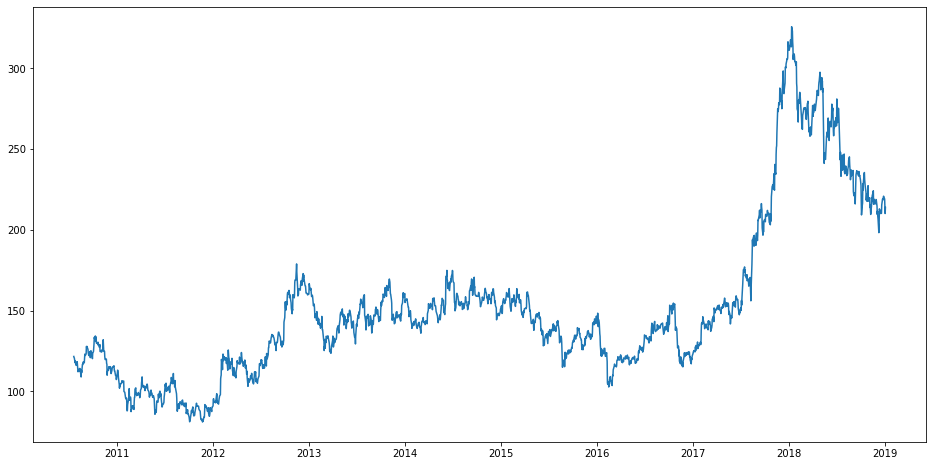

In [101]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

# **importing and intializing minmaxscalar**

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [104]:
df2.shape

(2100, 1)

In [105]:
df2

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.54595588],
       [0.52736928],
       [0.54268791]])

# **Splitting data to train and test data sets**

In [106]:
train_size=int(len(df2)*0.70)
test_size=len(df2)-train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [107]:
train_size,test_size

(1470, 630)

In [108]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [109]:
time_step = 100
X_train,Y_train = create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data,time_step)

In [110]:
print(X_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.16707516 0.18566176 0.16993464 ... 0.1744281  0.19281046 0.18607026]
 [0.18566176 0.16993464 0.16666667 ... 0.19281046 0.18607026 0.18811275]
 [0.16993464 0.16666667 0.18218954 ... 0.18607026 0.18811275 0.18443627]]


In [111]:
print(X_test.shape,ytest.shape)

(529, 100) (529,)


In [112]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# **Creating a LSTM model**

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [114]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [115]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# **Training the model**

In [116]:
model.fit(X_train,Y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 11s 260ms/step - loss: 0.0134 - val_loss: 0.0436
Epoch 2/100
22/22 [==============================] - 4s 199ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 3/100
22/22 [==============================] - 4s 200ms/step - loss: 0.0010 - val_loss: 0.0051
Epoch 4/100
22/22 [==============================] - 4s 198ms/step - loss: 8.4754e-04 - val_loss: 0.0041
Epoch 5/100
22/22 [==============================] - 4s 198ms/step - loss: 8.1451e-04 - val_loss: 0.0039
Epoch 6/100
22/22 [==============================] - 4s 197ms/step - loss: 7.7577e-04 - val_loss: 0.0036
Epoch 7/100
22/22 [==============================] - 4s 196ms/step - loss: 7.5244e-04 - val_loss: 0.0041
Epoch 8/100
22/22 [==============================] - 4s 195ms/step - loss: 7.4679e-04 - val_loss: 0.0032
Epoch 9/100
22/22 [==============================] - 4s 198ms/step - loss: 7.0984e-04 - val_loss: 0.0030
Epoch 10/100
22/22 [==============================] - 4s 200ms/ste

# **Predicting closing values**

In [117]:
import tensorflow as tf

In [118]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [119]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [120]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

132.70494656399194

In [121]:
math.sqrt(mean_squared_error(ytest,test_predict))

212.16214203528537

# **Plotting our predictions and trained data**

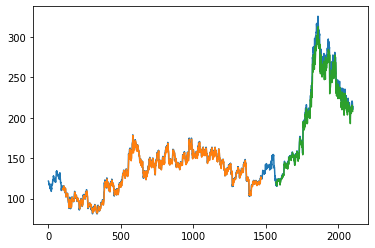

In [122]:
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]= train_predict
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **Conclusion**
We've come to the conclusion that the LSTM model has a lower loss rate and is more efficient and accurate in predicting stock market prices or time series data.